When cluster have overlapping points K-Means does not work well. To resolve this issue we can use GMM. Unlike K means it does soft clustering and calculates probability instead of calculating distance. it uses expectation maximization

Algorithm:
1. start with random mean, and variance
2. find probabilities of each points for each candidate distributions 
3. Update the mean, variance with weighted probability. 
4. iterate until all points settle down

In this example I will use BIC to find optimal values of number of cluster/ number of GMM

Model selection or finding optimal value of parameters is challenging. The traditional approach does not take account complexity of the model while evaluating them. They only look into desired metrices. The following approach look into both. It does not require TEST dataset or does not need to split train dataset  
AIC (Akaike Information Criterion)
BIC ( Bayesian  Information Criterion): scoring a model based on its log-likelihood and complexity



AIC = n * LL + 2 * k
BIC = n * LL + k * log(n)

n= Number of sample, LL= log(sum of squared residuals), k= number of parameter

https://machinelearningmastery.com/probabilistic-model-selection-measures/

In [55]:
#import necessary packages
from medpy.io import load, save
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
import matplotlib.pyplot as plt

In [56]:
#read image
img, h =load("dataset/brain1.nii.gz")
img_gt, h =load("dataset/brain1_labels.nii.gz")
print(img.shape)
img_res=img.reshape((-1,1))

(148, 187, 155)


In [57]:
#define model and parameters
n_cluster=10
score=[]
k=[]
for i in range(1,n_cluster):
    gmm=GMM(n_components=i,covariance_type="tied")
    gmm.fit(img_res)
    score.append(gmm.bic(img_res))
    k.append(i)
    

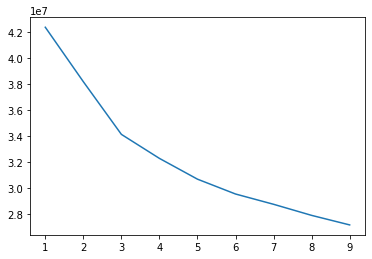

In [59]:
#plot score and pick number from elbow
plt.plot(k,score)
plt.show()

In [51]:
#use optimal parameter to make final model
optimal_cluster=5
gmm=GMM(n_components=optimal_cluster,covariance_type="tied")
gmm.fit(img_res)
predicted_labels=gmm.predict(img_res)

In [60]:
#predict and visualize side by side
predicted_labels=predicted_labels.reshape((img.shape[0], img.shape[1], img.shape[2]))

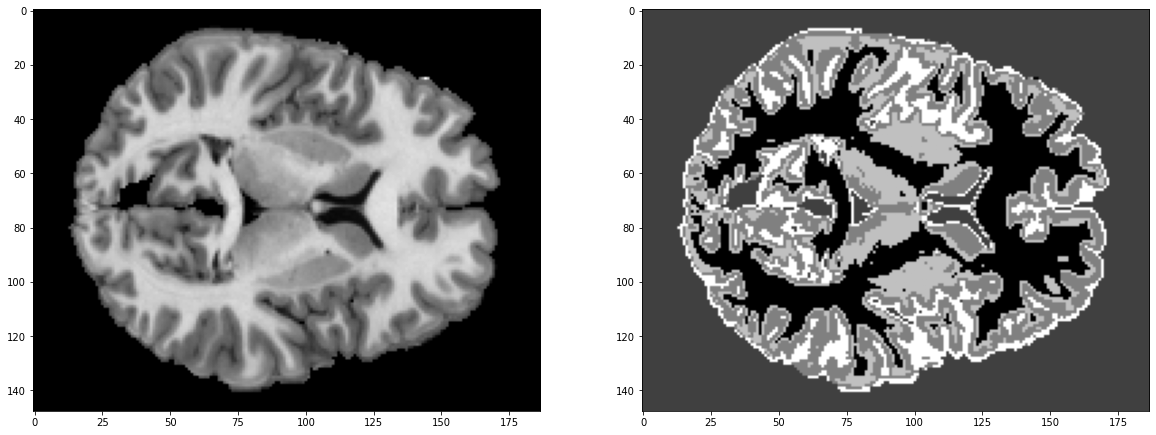

In [54]:
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(20,20))
ax[0].imshow(img[:,:,80],cmap="gray")
ax[1].imshow(predicted_labels[:,:,80], cmap="gray")

plt.show()
